**A - В стране котиков**

Представьте, что вы министр образования страны котиков. Вам нужно решить, какие школы лучше: маленькие или большие. Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет cat_exam_data.csv со следующими полями:

school 
−
− номер школы;
test_score 
−
− результат одного ученика из этой школы;
number_of_students 
−
− кол-во учеников в школе.
Задача состоит из 10 пунктов, под каждый из которых предусмотрена соответствующая функция в классе CatExam:

1. Загрузите датасет с результатами экзамена. Используйте функцию pd.read_csv.
2. Посмотрите на первые пять строк таблицы. Это можно сделать с помощью метода head.
3. Проверьте, есть ли пропуски в данных (NaN). Вам могут помочь методы isna и dropna. Необходимо вернуть список из названий колонок таблицы, в которых есть пропуски.
4. Удалите строки таблицы, в которых есть пропуски. Следующие пункты выполняйте с данными без пропусков.
5. Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции.
6. Посчитайте сколько котиков получили 100 баллов.
7. Выведите подробную информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ. Отсортируйте эти школы по количеству стобалльников и номеру школы в порядке убывания. Колонку с количеством стобалльников нужно назвать 'cnt_100'. Из функции необходимо вернуть pandas.DataFrame со столбцами ['school', 'number_of_students', 'cnt_100']. Подсказка: Могут помочь методы groupby, sort_values, transform, reset_index и count.
8. Посчитайте средний результат каждой из школ. Рассматриваем все школы, не только со стобальниками. Отсортируйте школы по среднему результату и посмотрите на топ 10 лучших школ по этому параметру. Из функции необходимо вернуть pandas.DataFrame со столбцами ['school', 'test_score', 'number_of_students']. Подсказка: Может помочь метод mean.
9. Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим. Посмотрите теперь на 10 худших школ.
10. Сгруппируйте учеников в зависимости от типа школы, получив тем самым два датасета. Будем считать, что школа небольшая, если в ней не более 1000 учеников. Постройте гистограммы оценок этих двух выборок на одном графике, установив параметры:
bins=10 
−
− число бинов гистограммы;
alpha=0.5 
−
− прозрачность бинов; Оси и сам график должны быть подписаны, должна быть легенда, которая различает две гистограммы. Функция должна вернуть matplotlib.axes.Axes, на котором рисовался график (в шаблоне возвращаемое значение уже есть). Вызывать plt.show() нельзя, этот метод сбрасывает текущий холст.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import typing as tp
from matplotlib.axes import Axes


class CatExam:
    df = pd.DataFrame()
    def __init__(self, path_to_df: str="cat_exam_data.csv"): # task0
      self.df = pd.read_csv(path_to_df)

    def task1(self) -> pd.DataFrame:
      return self.df.head(5)
    
    def task2(self) -> tp.List[str]:
      return self.df.columns[self.df.isna().any()].tolist()

    def task3(self) -> pd.DataFrame:
      self.df = self.df.dropna()
      return self.df

    def task4(self) -> pd.DataFrame:
      return self.df.describe()
    
    def task5(self) -> int:
      return (self.df['test_score']== 100).sum()
    
    def task6(self) -> pd.DataFrame:
      new_df = self.df.loc[(self.df['test_score'] == 100)]
      spec = pd.DataFrame({'cnt_100' : new_df.groupby(by = 'school').size()})['cnt_100']
      new_df.drop_duplicates(subset = 'school', inplace = True)
      new_df = new_df.merge(spec, how = 'outer', left_on = 'school', right_on = 'school')
      new_df.sort_values('cnt_100', ascending=[False], inplace = True)
      new_df.sort_values('school', ascending=[False], inplace = True)

      new_df.drop('test_score', axis=1, inplace=True)
      return new_df


    def task7(self) -> pd.DataFrame:
      return self.df.groupby(by='school').mean().reset_index().sort_values('test_score', ascending=[False]).head(10)

    def task8(self) -> pd.DataFrame:
      return self.df.groupby(by='school').mean().reset_index().sort_values('test_score').head(10)


    def task9(self) -> Axes:
      small_school = self.df[self.df['number_of_students'] <= 1000]
      big_school = self.df[self.df['number_of_students'] > 1000]
      names = ('big', 'small')
      plt.hist((small_school['test_score'],big_school['test_score']), bins = 10, alpha=0.5, label=names)
      plt.legend()
      plt.xlabel('Оценка')
      plt.ylabel('Количество')
      plt.title('Histogram')
      return plt.gca()

test = CatExam()
CatExam.__init__(test)
CatExam.task3(test)

#print(test.df.isna().sum())
#CatExam.task5(test)
#print(CatExam.task6(test))

#test.df['test_score'] = test.df['test_score'].mean()
CatExam.task7(test)

CatExam.task9(test)

**B - Youtube**


Задача заключается в работе с данными о трендах на YouTube. В этом вам поможет библиотека seaborn, которая была рассмотрена на одной из последних лекций.

Задача состоит из 7 пунктов, под каждый из которых предусмотрена соответствующая функция в классе YouTube:

**Часть I. Подготовка данных**

1. Скачайте файл RUvideos_short.csv с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на kaggle.
2. Прочитайте данные с помощью библиотеки pandas. В колонке trending_date записана дата. При чтении таблицы распознайте ее правильным образом.

Замечание. Часто считывание дат — головная боль аналитика.

Верните считанную таблицу с колонкой trending_date типа datetime64
3. В таблице много лишних данных. Оставьте следующие столбцы:
trending_date 
−
− дата в формате год-день-месяц;
category_id 
−
− категория видео (названия приведены в файле RU_category_id.json, но в этой задаче они не пригодятся);
views 
−
− количество просмотров видео;
likes 
−
− количество лайков;
dislikes 
−
− количество дислайков;
comment_count 
−
− количество комментариев.
Из даты оставьте только день. Для этого можно у каждого объекта даты взять поле day - здесь вам поможет метод apply. Верните получившуюся таблицу.

**Часть II. Некоторая визуализация**
4. Постройте ящики с усами на каждый день по количеству просмотров.
5. Насколько хороший получился график в прошлом пункте? Исправьте этот недостаток, установив некоторое значение.
6. Постройте jointplot по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной.
7. Насколько информативен график из прошлого пункта? Исправьте этот недостаток.

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
import typing as tp


class YouTube:
    df = pd.DataFrame()

    def __init__(self, path_to_df: str = "RUvideos_short.csv"):
        self.df = pd.read_csv(path_to_df)

    def task1(self) -> pd.DataFrame:
        self.df['trending_date'] = pd.to_datetime(self.df['trending_date'].str.replace('[^\w\s]',''),  format='%y%d%m')
        return self.df

    def task2(self) -> pd.DataFrame:
        self.df = self.df[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
        self.df['trending_date'] = self.df['trending_date'].apply(lambda x: x.day)
        return self.df

    def task3(self) -> Figure:
        sns.boxplot(data=self.df, x='trending_date', y='views')
        plt.title('Количество просмотров')
        return plt.gcf()

    def task4(self) -> Figure:
        sns.boxplot(data=self.df, x='trending_date', y='views')
        plt.title('Количество просмотров')
        plt.ylim(0, 500000)
        sns.set(rc = {'figure.figsize':(14,14)})
        plt.rcParams.update({'font.size': 15})
        #plt.figure(figsize = (14, 14))

        plt.savefig("B4_BoxPlot.png", bbox_inches="tight")

        return plt.gcf()

    def task5(self) -> Figure:
        plot = sns.jointplot(x = self.df['views'], y = self.df['likes'], alpha=0.5)
        plt.title('JointPlot в соотношении просмотры-лайки')

        return plt.gcf()

    def task6(self) -> Figure:
        self.df = self.df[self.df['views'] < 400000]
        self.df = self.df[self.df['likes'] < 15000]
        plot = sns.jointplot(x = self.df['views'], y = self.df['likes'], alpha=0.5, height = 14)
        plot.fig.suptitle('JointPlot в соотношении просмотры-лайки')
        plt.savefig("B6_JointPlot.png", bbox_inches="tight")
        plt.rcParams.update({'font.size': 15})
        return plt.gcf()

test = YouTube()
YouTube.__init__(test)

YouTube.task1(test)
YouTube.task2(test)
#YouTube.task3(test)
YouTube.task4(test)
YouTube.task5(test)
YouTube.task6(test)


**C - YouTube2**

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле RU_category_id.json. Код для чтения этого файла и извлечения из него необходимой информации в виде pandas-таблицы уже написан в шаблоне решения.

Задача состоит из 6 пунктов, под каждый из которых предусмотрена соответствующая функция в классе YouTube2:

1. Загрузите датасет с данными о видео в российском сегменте Youtube. Код для формирования таблицы с категориями уже написан. При считывании таблицы trends_df не забудьте правильно распознать дату.
2. Объедините две таблицы на основе индекса категории. Это можно сделать с помощью метода merge. Далее используйте названия категорий, а не id.
3. Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощью функции pivot_table. Пропуски заменять не нужно.
4. Визуализируйте таблицу с помощью heatmap. Для информативности поделите все числа на 10^6 и не забудьте про подписи в клетках heatmap.
5. Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров". Пропуски заменять не нужно.
Визуализируйте таблицу с помощью heatmap. Для информативности поделите все числа на 10^6. 
6. При построении, аналогичном пункту 3, график получается неинформативным. Вам нужно это исправить.

<ipython-input-5-0dab75a61464>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  self.trends_df['trending_date'] = pd.to_datetime(self.trends_df['trending_date'].str.replace('[^\w\s]',''),  format='%y%d%m')


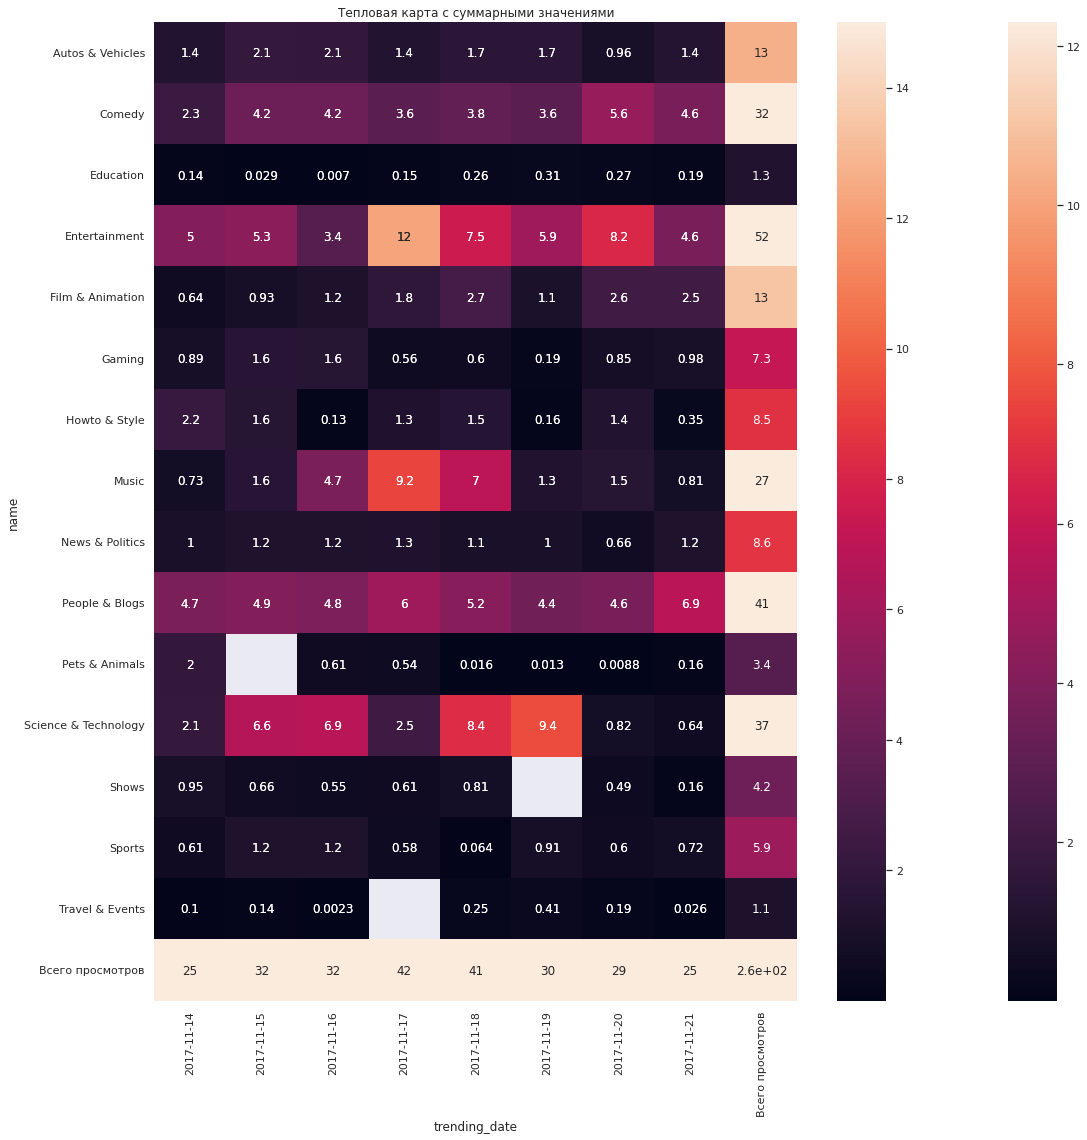

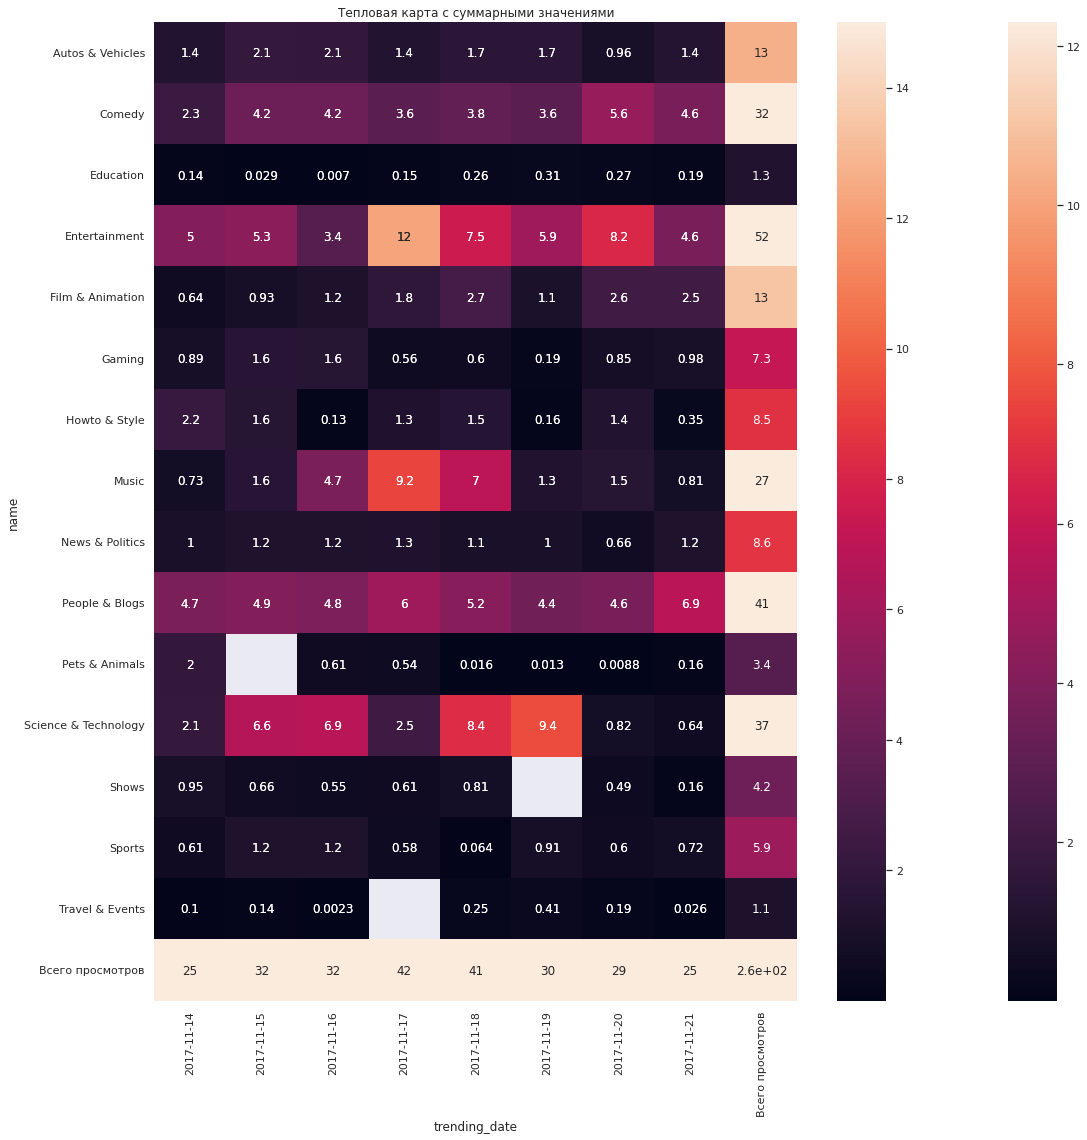

In [ ]:
import json
import typing as tp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib.figure import Figure


class YouTube2:

  trends_df = pd.DataFrame()
  categories_df = pd.DataFrame()
  def __init__( # task0
      self,
      trends_df_path: str="RUvideos_short.csv",
      categories_df_path: str="RU_category_id.json"
  ):

    with open(categories_df_path) as json_file:
        json_data = json.load(json_file)
        
    self.categories_df = pd.DataFrame(columns=['id', 'name'])

    for item in json_data['items']:
        self.categories_df = self.categories_df.append(
            {'id': int(item['id']),
            'name': item['snippet']['title']},
            ignore_index=True
        )
        
    self.categories_df['id'] = self.categories_df['id'].astype(int)
    self.trends_df = pd.read_csv(trends_df_path)
    self.trends_df['trending_date'] = pd.to_datetime(self.trends_df['trending_date'].str.replace('[^\w\s]',''),  format='%y%d%m')

  def task1(self) -> pd.DataFrame:
    self.trends_df = pd.merge(self.trends_df, self.categories_df, left_on = 'category_id', right_on = 'id')
    #self.trends_df.drop('id', axis=1, inplace=True)
    return self.trends_df
  

  def task2(self) -> pd.DataFrame:
    return pd.pivot_table(self.trends_df, values='views', index='name', columns='trending_date', aggfunc = np.sum)


  def task3(self) -> Figure:
    self.trends_df['trending_date'] = self.trends_df['trending_date'].dt.date
    spec = YouTube2.task2(self)/pow(10, 6)
    sns.set(rc = {'figure.figsize':(18,18)})
    plt.title('Тепловая карта по категории/просмотрам')
    sns.heatmap(spec, annot=True)
    plt.savefig("C3_HeatMap.png", bbox_inches="tight")

    return plt.gcf()


  def task4(self) -> pd.DataFrame:
    return pd.pivot_table(self.trends_df, values='views', index='name', columns='trending_date', aggfunc = np.sum, margins = True, margins_name='Всего просмотров')


  def task5(self) -> Figure:
    spec = YouTube2.task4(self)/pow(10, 6)
    plt.title('Тепловая карта с суммарными значениями')
    sns.set(rc = {'figure.figsize':(18,18)})
    sns.heatmap(spec, annot=True, vmax = 15)
    plt.savefig("C5_HeatMap.png", bbox_inches="tight")
    plt.rcParams.update({'font.size': 20})
    return plt.gcf()

test = YouTube2()
YouTube2.__init__(test)
YouTube2.task1(test)

#print(test.trends_df.dtypes)
#print(test.categories_df)
YouTube2.task3(test)
YouTube2.task5(test)